# Deep Learning Coursework

# Details
2322021C

### Design Choices: 

The original architecture chosen was similiar to the LeNet architecture. I chose a lower number of channels per convolution to conform to the idea of occams razor. However, this provided poor results, resulting in a low accuracy. Therefore, I decided to beef up the archtecture by implementing VGG-16 styled on. Looking at the lecture notes, I noted that perhaps I should add some batch normalisation and drop out to help improve regularisation. Initally this model did suprisingly well! But then I noticed I was potentially leaking data into the testing set, so after a few variations of the final model, (removing blank images, trying greyscale vs full colour, L2 regularisation), I redesigned how I was splitting the data and got a more realistic accuracy of around 81%.

The optimiser that seemed to work best was SGD with a momentum of 0.9, Adam just did not seem to produce better results. Since learning with the final model was expensive, I didn't manage to tune momentum and LR too much but the final parameters chosen were recommended by the VGG paper and the pytorch docs. However, I did notice than a learning rate over 0.01 was too high and caused the model to skip between minima. 

The pre-processing I decided to go with rotations, greyscaling, cropping and flips. At points I also removed some data from the dataset such as blank images to see if that would have an effect, it was only marginal. The greyscale transform was used at times because it did not seem like colour is a major factor in identifying these images. I did manage to get good accuracy of arround 80% by reducing the dataset to grey scale. 

The training, validation and testing set were split like so [:, 15, 15] per class
with the traning set typicalling getting 2000 transformations per class and the testing set getting 100 per class to expand the imbalanced dataset. 

Typical training regime, typically used batch sizes of either 64 or 128, and trained usually with around an expensive 150 epochs. After each epoch the model is evaluated on both the training and evaluation sets. Then once training is complete, the model is evaluated on the test set where a confusion matrix is made. 

### Results

So, the resulting accuracy is 81%. Looking at the confusion matrix, the model is definitely getting confused between 
* Leptoclndrus and Rhizosolenia
* C Fusus and Rhizosolenia 
* Leptoclndrus and Cufus

Loading these images its doesn't come as a surprise as these all look very similiar (rectangluar shaped). The model is probably overfitting to the particular images and cannot generalise between them well enough. Or it is failing to capture specifics about the structure and needs to be more representative ie it is underfitting. I am not entirely sure and would need to be tested by each case. It attempted to account for overfitting by adding regularisation which did appear to get the model over hard to reach gradients faster. 
I did, however, notice in the dataset, these accounted for most of the blank images. Perhaps there was some cross over between these classes because of this? I tested the model out without these images but it did not seem to improve the model. 

### Future Study

For future study, perhaps testing both a more complex model such as a resnet style with the convolutions not decreasing in size but having connections between them to learn the deeper representationg of each of the misclassified classes. 


# Deep Learning 2022 - Coursework
## Classifying Plankton!

The aim of this coursework will be for you to design a deep learning architecture to predict identify plankton species from images. 

***Your aim is to design a model that, when given a new image of a plankton speciment would return to which species it belongs to.***

You are free to use any architecture you prefer, from what we have seen in class. You can decide to use unsupervised pre-training of only supervised end-to-end training - the approach you choose is your choice. 

### Hand-in date: Friday 25th of March before 4:30pm (on Moodle)

### Steps & Hints
* First, look at the data. What are the different classes? How different are they? What type of transformations for your data augmentation do you think would be acceptable here?. 
* You will note that it is *very* imbalanced (large differences in number of samples between classes) --- this will be one challenge to look for. 
* Also, note that the dataset is rather small (hint: you will need to think about data augmentation!). 
* Second, try and load the data and separate into training, validation and test set (or better, use cross-validation)
* Write a DataLoader class for the data (Hint: you will want to put the data augmentation in the data loader). 
* Think about pre-processing of the input? The output? Normalisation or not? Data augmentation? Which one? 
* Design a network for the task. What layers? How many? Do you want to use an Autoencoder for unsupervised pre-training? 
* Choose a loss function for your network
* Select optimiser and training parameters (batch size, learning rate)
* Optimise your model, and tune hyperparameters (especially learning rate, momentum etc)
* Analyse the results on the test data. How to measure success? Which classes are recognised well, which are not? Is there confusion between some classes? Look at failure cases. 
* If time allows, go back to drawing board and try a more complex, or better, model. 
* Explain your thought process, justify your choices and discuss the results!

### Submission
* submit ONE zip file on Moodle containing: 
  * **your notebook**: use `File -> download .ipynb` to download the notebook file locally from colab. 
  * **a PDF file** of your notebook's output as you see it: use `File -> print` to generate a PDF. 
* your notebook must clearly contains separate cells for: 
  * setting up your model and data loader
  * training your model from data
  * loading your pretrained model from github/gitlab
  * testing your model on test data. 
* The training cells must be disabled by a flag, such that when running *run all* on your notebook it does
  * load the data
  * load your model 
  * apply the model to the test data
  * analyse and display the results and accuracy 
* In addition provide markup cell:
  * containing your student number at the top
  * to describe and motivate your design choices: architecture, pre-processing, training regime
  * to analyse, describe and comment on your results
  * to provide some discussion on what you think are the limitations of your solution and what could be future work

* **Note that you must put your trained model on a github so that your code can download it.**


### Assessment criteria 
* In order to get a pass mark, you will need to demonstrate that you have designed and trained a deep NN to solve the problem, using sensible approach and reasonable efforts to tune hyper-parameters. You have analysed the results. It is NOT necessary to have any level of accuracy (a network that predicts poorly will always yield a pass mark if it is designed, tuned and analysed sensibly). 
* In order to get a good mark, you will show good understanding of the approach and provide a working solution. 
* in order to get a high mark, you will demonstrate a working approach of gradual improvement between different versions of your solution. 
* bonus marks for attempting something original if well motivated - even if it does not yield increased performance. 
* bonus marks for getting high performance, and some more points are to grab for getting the best performance in the class. 

### Notes
* make sure to clearly set aside training, validation and test sets to ensure proper setting of all hyperparameters. 
* I recommend to start with small models that can be easier to train to set a baseline performance before attempting more complex one. 
* Be mindful of the time!

In [ ]:
DISABLED_FLAG = True

### Data 
The following cells will show you how to download the data and view it. 

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import collections

# Loading the data
# we will use wget to get the archive
!wget --no-check-certificate "https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1" -O plankton.pt



--2022-03-25 13:31:32--  https://www.dropbox.com/s/v2udcnt98miwwrq/plankton.pt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/v2udcnt98miwwrq/plankton.pt [following]
--2022-03-25 13:31:32--  https://www.dropbox.com/s/dl/v2udcnt98miwwrq/plankton.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc98e6985f4236679aa6f0cb7a80.dl.dropboxusercontent.com/cd/0/get/BiJePBZYxyJZ6RSMv8H8xJ22tJ01GBmwIAlevnJYUjlX34a8tcRx4JIMpZjH6U8yAXSzVRPgI0l_LWIeRe13sf6OZh6uPYaGRHZOqBDA_8WcP6Kuitw9jSa9wr5SZU8wNOA1AXXKKFeAtdfhi6m_aXXnuJpTaANek9E4oR85Q4JlUg/file?dl=1# [following]
--2022-03-25 13:31:32--  https://uc98e6985f4236679aa6f0cb7a80.dl.dropboxusercontent.com/cd/0/get/BiJePBZYxyJZ6RSMv8H8xJ22tJ01GBmwIAlevnJYUjlX34a8tcRx4JIMpZjH6U8yAXSzV

The classes in this dataset are: 
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

And the numbers of examples per class are: 
0.0     134
1.0      65
2.0     257
3.0     110
4.0      70
5.0      67
6.0      92
7.0     219
8.0     235
9.0      76
10.0    157
11.0    135
dtype: int64
1617


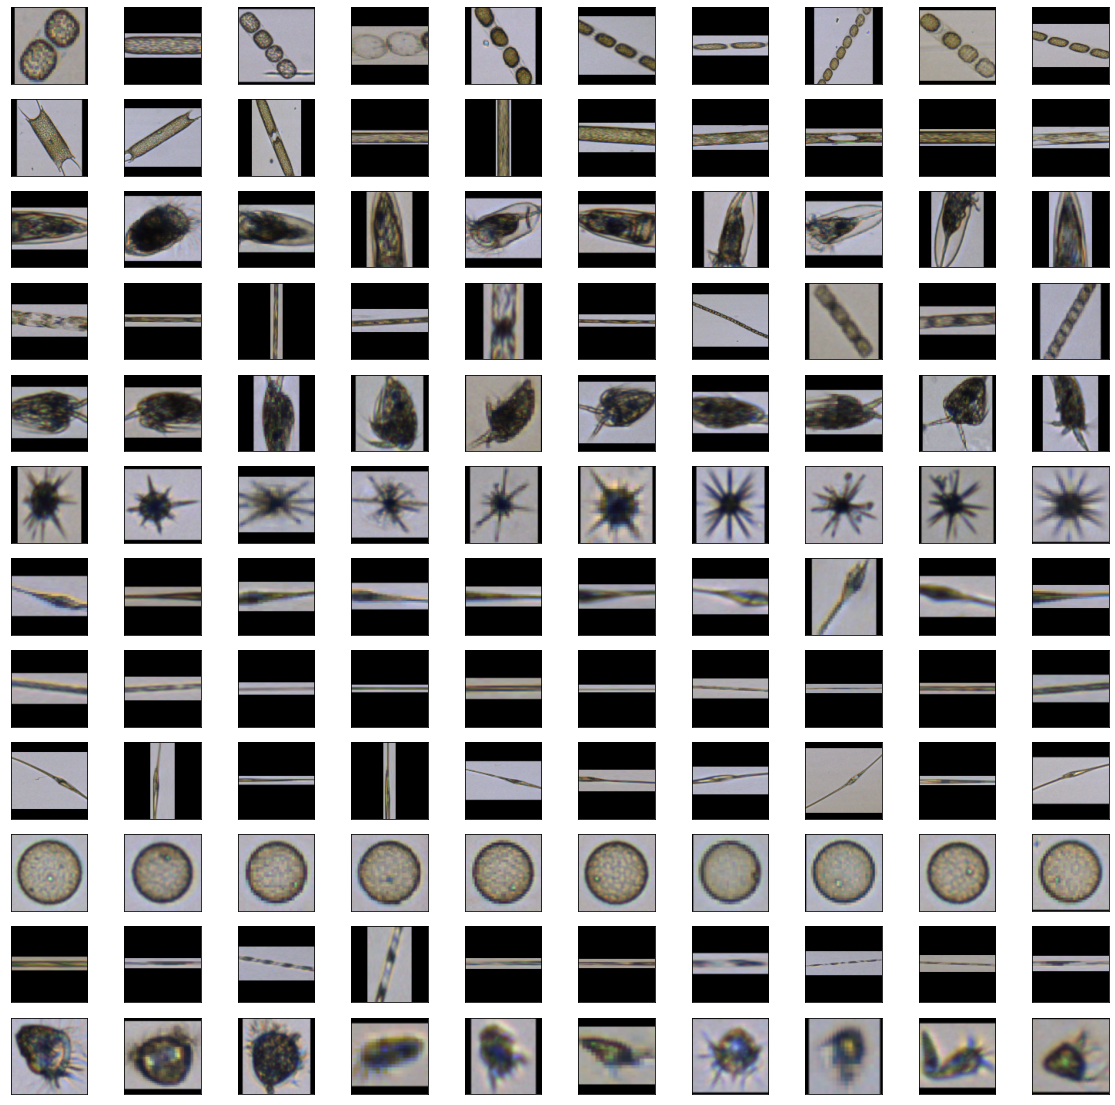

In [ ]:
data = torch.load('plankton.pt')

# get the number of different classes
classes = data['labels'].unique()
nclasses = len(classes)
print('The classes in this dataset are: ')
print(classes)

# display the number of instances per class: 
print('\nAnd the numbers of examples per class are: ')
print((pd.Series(data['labels']).value_counts().sort_index()))
print(pd.Series(data['labels']).value_counts().sum())

# we now print some examples from each class for visualisation
fig = plt.figure(figsize=(20,20))

n = 10 # number of examples to show per class

for i in range(nclasses): 
  idx = data['labels'] == classes[i]
  imgs = data['images'][idx,...]
  for j in range(n):
    ax = plt.subplot(nclasses,n,i*n+j+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow( imgs[j,...].permute(1, 2, 0) ) # note the permute because tensorflow puts the channel as the first dimension whereas matplotlib expects WxHx3
plt.show()


In [ ]:
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Section 0: Helper Functions

So this section will cover any function that will aid in the deep learning models such as visualisations and formatters etc.

You can skip this section.

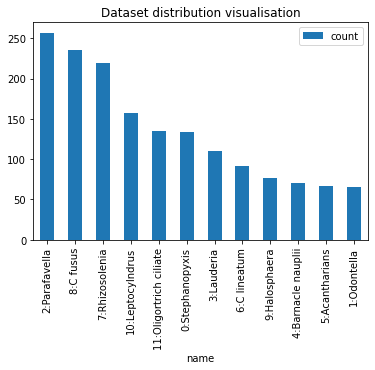

In [ ]:
def visualise_class_distribution(data):
  """
    This allows us to examine the plankton data tensor
  """
  
  classes = data["labels"]
  names = pd.Series(data["names"]).reset_index().rename(columns={"index":"name",0:'num'})
  names["name"] = names["num"].astype(str) + ":" + names["name"]
  counts = pd.Series(classes).value_counts().reset_index().rename(columns={"index":"num",0:'count'})
  vis_data = pd.merge(counts,names, on="num")
  vis_data.plot(kind="bar", x='name', y='count', title="Dataset distribution visualisation")

visualise_class_distribution(data)

In [ ]:
from random import randint

def sample_images(data, n):
  """
    Randomly sample from plankton data tensor
  """
  imgs = []
  for x in range(n):
    random_index = randint(0,len(data["images"]))
    imgs.append(data["images"][random_index])
  return imgs

samples = sample_images(data,5)


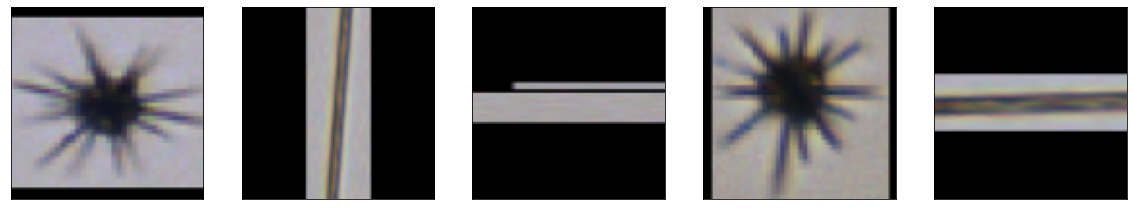

In [ ]:
def print_images(imgs, grey_scale=False):
  """
    Given a list of tensor imgs, print them
  """
  f, axarr = plt.subplots(1,len(imgs))
  f.set_figheight(20)
  f.set_figwidth(20)
  for j in range(len(imgs)):
    axarr[j].get_xaxis().set_visible(False)
    axarr[j].get_yaxis().set_visible(False)
    if grey_scale:
      axarr[j].imshow(imgs[j].permute(1, 2, 0).squeeze(axis=2), cmap='gray',interpolation='none')
    else:
      axarr[j].imshow(imgs[j].permute(1, 2, 0))
  plt.show()

print_images(samples)

In [ ]:
def class_inbalanced(data):
  """
  Returns a Pandas Series with class names and their imbalance (ie max # samples - class # samples)
  """
  counts = pd.Series(data["labels"]).value_counts().reset_index().rename(columns={"index":"index",0:'count'})
  max = counts.max()["count"]
  counts["count"] = max- counts["count"]
  counts = counts.set_index("index")

  return counts["count"]



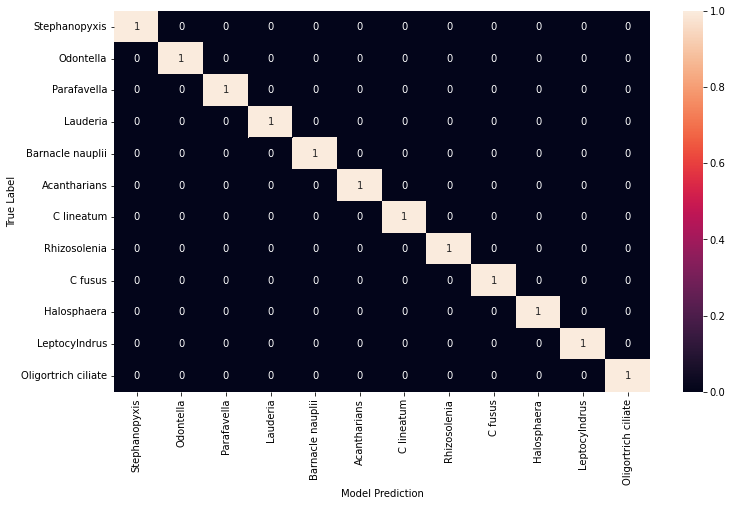

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import seaborn as sn

def create_confusion_matrix(y_true, y_pred):
  """
    Given a set of predictions and labels, plot a confusion matric 
  """
  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix, index=[name for name in data["names"]], columns = [name for name in data["names"]])
  plt.figure(figsize = (12,7))
  cm = sn.heatmap(df_cm, annot=True)
  cm.set(xlabel="Model Prediction", ylabel="True Label")
  plt.show()

pred = []
true = []
for i in range(0,12):
    pred.append(i)
    true.append(i)
create_confusion_matrix(true,pred)

In [ ]:
def sample_image_by_label(data, label):
  """
    Given a label and a dataset, sample a random image and return it's label
  """
  label_positions = np.argwhere(data['labels'].numpy() == label)
  random_index = randint(0, len(label_positions)-1)
  arg = label_positions[random_index][0]
  img = data['images'][arg]
  return img, label

In [ ]:
def add_imgs(data, imgs, labels):
  """
    Given a list of tensor images and labels, add to existing data tensor
  """
  imgs = torch.stack(imgs)
  labels = torch.Tensor(labels)
  data["images"] = torch.cat((data["images"], imgs), 0)
  data["labels"] = torch.cat((data["labels"], labels), 0)
  return data


In [ ]:
from torchvision.transforms import Grayscale

def augment_data(transform, imgs_per_class=None, data=None, greyscale=True):

  """
    Augment a the plankton data tensor with some transforms,
    adding a number of imgs per class to balance them.
  """
  if data is None:
    data = torch.load('plankton.pt')
  
  if greyscale:
    data["images"] = Grayscale(1)(data["images"])
  classes = data["labels"]
  classes = pd.Series(classes).value_counts()
  max_count = classes.max()
  for label, count in classes.items():
    imgs = []
    lbs = []
    if not imgs_per_class:
      imgs_to_generate = max_count - count
    else:
      imgs_to_generate = imgs_per_class - count
    while imgs_to_generate > 0:
      img, lb = sample_image_by_label(data, label)
      img = transform(img)
      imgs_to_generate -= 1
      imgs.append(img)
      lbs.append(lb)
    data = add_imgs(data, imgs, lbs)
  return data

In [ ]:
from torch.utils.data import random_split
def get_split(data, split):
  """
    Given a tensor dataset, return a randomly split selection
  """
  ds = PlanktonDataset(data=data)
  numb_imgs = len(data["images"])
  train  = round((split[0]/100) * numb_imgs)
  val   = round((split[1]/100) * numb_imgs)
  test = round((split[2]/100) * numb_imgs)

  if numb_imgs > train + val + test:
    train += (numb_imgs - train + val + test)
  
  return random_split(ds,[train, val, test])



In [ ]:
def get_loaders(train, val, test, batch_size=16):
  """
    Given a tensor dataset, return Dataloader of each split
  """
  train_loader = DataLoader(train, batch_size, shuffle=True)
  val_loader = DataLoader(val, batch_size, shuffle=True)
  test_loader = DataLoader(test, batch_size, shuffle=True)
  return train_loader, val_loader, test_loader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score

loss_fn = nn.CrossEntropyLoss()

def train_model(epoch, model, optimiser, train_loader):
  """
    Trains model for each epoch
  """
  model.train()

  for batch_num, (imgs, labels) in enumerate(train_loader):
    
    labels = labels.type(torch.LongTensor)
    imgs, labels = imgs.to(device), labels.to(device)

    # Zero out gradient and ge
    optimiser.zero_grad()
    outputs = model(imgs)
    loss = loss_fn(outputs, labels)

    # Backprop
    loss.backward()

    # Take a step in gradient
    optimiser.step()

    if batch_num % 50 == 0:
      print(f'Train Epoch {epoch}: Training Loss:{float(loss.item())}')

def evaluate(model, loader, loss_, acc_, name="Train"):
  """
    At end of epoch, evaluate val/training set
  """
  model.eval()

  loss = 0
  correct = 0

  for imgs, labels in loader:

    labels = labels.type(torch.LongTensor)
    imgs, labels = imgs.to(device), labels.to(device)

    outputs = model(imgs)
    loss += F.cross_entropy(outputs, labels, reduction="sum").item()
    pred = outputs.argmax(dim=1, keepdim=True)
    correct += pred.eq(labels.data.view_as(pred)).sum().item()
  
  loss /= len(loader.dataset)

  print('{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    name,
    loss, correct, len(loader.dataset),
    100. * correct / len(loader.dataset)))

  loss_.append(loss)
  acc_.append(correct/len(loader.dataset))


def run(model, train_loader, val_loader, optimiser, epochs):

  train_loss = []
  train_acc = []
  validation_loss = []
  validation_acc = []

  for epoch in range(epochs):

    train_model(epoch, model, optimiser, train_loader)
    evaluate(model, train_loader, train_loss, train_acc, "Train")
    evaluate(model, val_loader, validation_loss, validation_acc, "Validation")
  
  return {
      "Train Loss": train_loss,
      "Train Accuracy": train_acc,
      "Validation Loss": validation_loss,
      "Validation Accuracy": validation_acc
  }


def test_model(model, test_loader, name="Test"):
    model.eval()
    model = model.to(device)
    test_loss = 0
    correct = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for imgs, label in test_loader:
            label = label.type(torch.LongTensor)
            imgs, label = imgs.to(device), label.to(device)
            output = model(imgs)
            test_loss += F.cross_entropy(output, label, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(label.view_as(pred)).sum().item()
            [y_pred.append(p[0]) for p in pred.data.cpu().numpy()]
            [y_true.append(t) for t in label.data.cpu().numpy()]

    test_loss /= len(test_loader.dataset)

    create_confusion_matrix(y_true, y_pred)
    
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(name,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    print("{} set: Micro F1 Score: {}\n".format(name, f1_score(y_true, y_pred, average='micro')))
    print("{} set: Macro F1 Score: {}\n".format(name, f1_score(y_true, y_pred, average='macro')))


In [ ]:
def plot_evaluation(train_loss, val_loss):
  df = pd.DataFrame({"train":train_loss, "validation":val_loss})
  sn.lineplot(data=df)

In [ ]:
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [ ]:
def get_class_index(data, name):
  arr = (np.array(list(data["names"].keys())))
  return np.argwhere(arr == name)[0][0]

In [ ]:
def remove_imgs_from_data(data, img_indexs):
  mask = torch.ones(data["labels"].numel(), dtype=torch.bool)
  mask[img_indexs] = False
  data["images"] = data["images"][mask]
  data["labels"] = data["labels"][mask]
  return data


# Section 1: Fixing the class imbalance



## Visualising Class Imbalance

As we can see the dataset is heavily imbalanced and there is only a few hundred or less samples between each class.

Steps to take:
* Ensure each class has same number of samples
* Ensure each new sample is transformed
* Create [300, 500, 1000, 2000] samples per class
* Create a set of transforms to try

In [ ]:
if not DISABLED_FLAG:
  visualise_class_distribution(data)

## Dataset

Pytorch requires a dataset to be made in order to utilise dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

class PlanktonDataset(Dataset):
  """
    Plankton dataset!
  """

  def __init__(self, transform=None, data=None):
    """
      Args: 
        transform (callable, optional): Optional transform to be applied on a sample
    """
    self.transform = transform
    if not data:
      self.dataset = torch.load('plankton.pt')
    else:
      self.dataset = data
    self.labels = self.dataset["labels"]



  def __getitem__(self, idx):
    img = self.dataset["images"][idx]
    label = self.dataset["labels"][idx]

    if self.transform:
      img = self.transform(img)
    
    return (img, label)
  
  def __len__(self):
    return len(self.labels)

# Normalisation

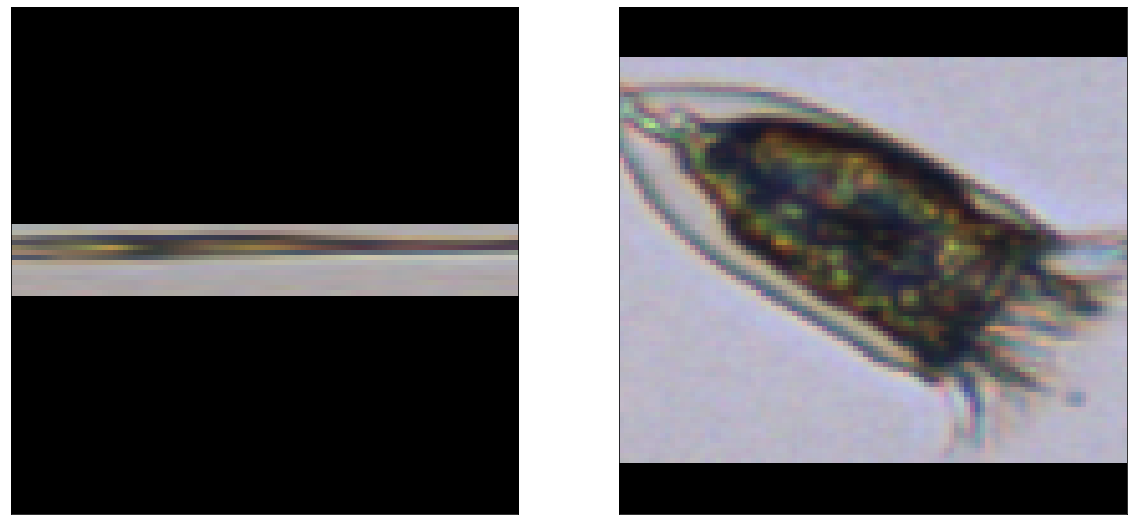

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


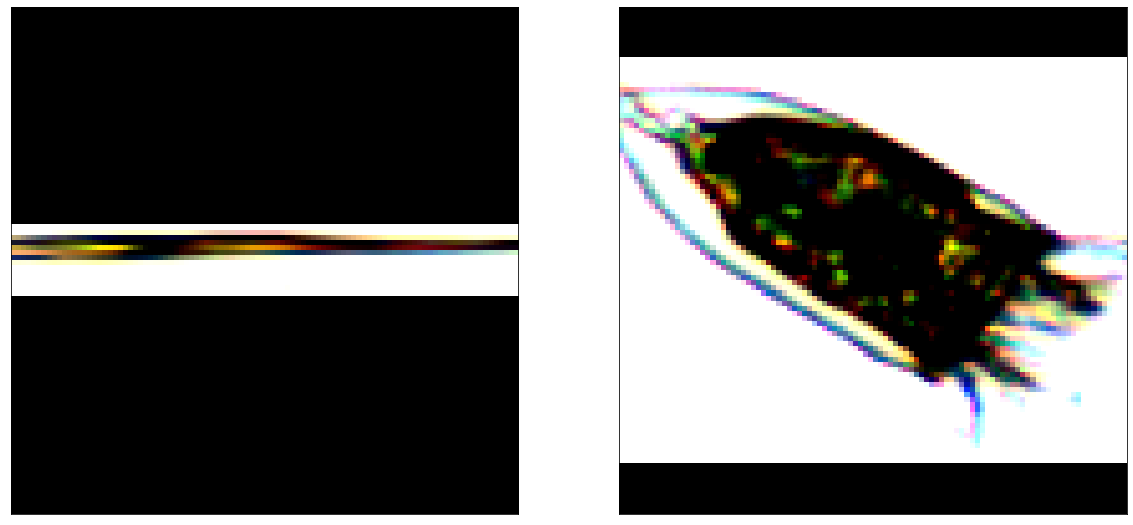

In [ ]:
from torchvision.transforms import Normalize
mean = data["images"].mean((0,2,3))
std =  data["images"].std((0,2,3))

imgs = sample_images(data, 2)
print_images(imgs)
imgs = [Normalize(mean, std)(imgs[i]) for i in range(len(imgs))]
print_images(imgs)

def get_mean_std(data):
  mean = data["images"].mean((0,2,3))
  std =  data["images"].std((0,2,3))
  return mean, std


## Transforms

This section defines the transforms to try out.

One thing I'll mention here, is the dataset is in RGB but I am going to assume that the added benefit of using RGB is negligable as the colour doesn't seem to be a huge factor. I could be wrong but it's an assumption I have made. 

In [ ]:
import torchvision.transforms as transform

# No transforms apart from greyscale
no_transforms = transform.Compose([
])

# Create our transforms 
full_transforms = transform.Compose([
  transform.RandomHorizontalFlip(),                       # Randomly does a horizontal flip
  transform.RandomVerticalFlip(),                         # Randomly does a vertical flip
  transform.RandomRotation(degrees=(0,360)),              # Randomly does a rotation
  transform.RandomResizedCrop((100,100), scale=(0.4,1)),  # Randomly does a crop
])

normalised_full_transforms = transform.Compose([
  transform.RandomHorizontalFlip(),                       # Randomly does a horizontal flip
  transform.RandomVerticalFlip(),                         # Randomly does a vertical flip
  transform.RandomRotation(degrees=(0,360)),              # Randomly does a rotation
  transform.RandomResizedCrop((100,100), scale=(0.4,1)),  # Randomly does a crop
  transform.Normalize(mean, std)
])

## Augment data

This will create various datasets each with varying number of samples per class.
This will create a balanced dataset from which to draw samples from

In [ ]:
if not DISABLED_FLAG:
  # no_transforms_500 = augment_data(no_transforms, 500)
  # no_transforms_1000 = augment_data(no_transforms, 1000)
  # no_transforms_2000 = augment_data(no_transforms, 2000)

  full_transforms_500 = augment_data(full_transforms, 500)
  full_transforms_1000 = augment_data(full_transforms, 1000)
  full_transforms_2000 = augment_data(full_transforms, 2000)

In [ ]:
if not DISABLED_FLAG:
  train, val, test = get_split(no_transforms_500, [60,20,20])
  train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=16)

# Section 2: Creating the models

## Baseline:
Conv [3x3] -> Max Pool /2 -> Cov [3x3] -> Max Pool /2 -> Conv [3x3] -> Max Pool /2 -> Flatten -> Dense -> Dense -> Softmax

So this is just a run of the mill CNN. The convo layers are increase in the number of filters each pass through the convolution and decrease the overall size of the input image to be passed in the dense layers. 

In [ ]:
from torchsummary import summary

def create_baseline():
  return nn.Sequential(collections.OrderedDict([
        ("1: Conv 1x100x100 -> 8x98x98", nn.Conv2d(1,8,3, stride=1, padding=0)),
        ("1: ReLU Activation", nn.ReLU()),
        ("1: Max Pool 8x98x98 -> 8x49x49", nn.MaxPool2d(2, stride=2, padding=0)),
        ("2: Conv 8x49x49 -> 16x47x47", nn.Conv2d(8,16,3, stride=1, padding=0)),
        ("2: ReLU Activation", nn.ReLU()),
        ("2: Max Pool 16x47x47 -> 16x23x23", nn.MaxPool2d(2, stride=2, padding=0)),
        ("3: Conv 16x23x23 -> 32x21x21", nn.Conv2d(16,32,3, stride=1, padding=0)),
        ("3: ReLU Activation", nn.ReLU()),
        ("3: Max Pool 32x21x21 -> 32x10x10", nn.MaxPool2d(2, stride=2, padding=0)),
        ("4: Flatten 32x10x10 -> 3200", nn.Flatten()),
        ("5: Dense 3200 -> 128", nn.Linear(3200, 128)),
        ("5: ReLU Activation", nn.ReLU()),
        ("6: Dense 128 -> 12", nn.Linear(128, 12)),
        ("6: Softmax Activation", nn.Softmax(dim=1)),
]))

if not DISABLED_FLAG:
  baseline_model = nn.Sequential(collections.OrderedDict([
          ("1: Conv 1x100x100 -> 8x98x98", nn.Conv2d(1,8,3, stride=1, padding=0)),
          ("1: ReLU Activation", nn.ReLU()),
          ("1: Max Pool 8x98x98 -> 8x49x49", nn.MaxPool2d(2, stride=2, padding=0)),
          ("2: Conv 8x49x49 -> 16x47x47", nn.Conv2d(8,16,3, stride=1, padding=0)),
          ("2: ReLU Activation", nn.ReLU()),
          ("2: Max Pool 16x47x47 -> 16x23x23", nn.MaxPool2d(2, stride=2, padding=0)),
          ("3: Conv 16x23x23 -> 32x21x21", nn.Conv2d(16,32,3, stride=1, padding=0)),
          ("3: ReLU Activation", nn.ReLU()),
          ("3: Max Pool 32x21x21 -> 32x10x10", nn.MaxPool2d(2, stride=2, padding=0)),
          ("4: Flatten 32x10x10 -> 3200", nn.Flatten()),
          ("5: Dense 3200 -> 128", nn.Linear(3200, 128)),
          ("5: ReLU Activation", nn.ReLU()),
          ("6: Dense 128 -> 12", nn.Linear(128, 12)),
          ("6: Softmax Activation", nn.Softmax(dim=1)),
  ]))
  baseline_model.to(device)
  summary(baseline_model, (1,100,100))

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lrs = [0.01, 0.001]
  momentums = [0.9, 0.7]
  batch_sizes = [64, 128]
  epochs = [50,100]

  models = []

  for lr in lrs:
    for momentum in momentums:
      for batch_size in batch_sizes:
        for epoch in epochs:
          results = {}
          baseline = create_baseline()
          baseline.cuda()
          optimiser = optim.SGD(baseline.parameters(), lr=lr, momentum=momentum,)
          train, val, test = get_split(full_transforms_2000, [60,20,20])
          train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=batch_size)
          results = run(baseline, train_loader, val_loader, optimiser, epoch)
          descriptor = f"Epochs {epoch}, LR {lr}, Momentum {momentum}, Batch-Size {batch_size}"
          print(descriptor)
          results[descriptor] = results
          plot_evaluation(results["Train Loss"], results["Validation Loss"])
          plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])
          models.append(baseline)

These graphs are not accurate as the test loader is different for each model thus we might bet fairly high accurarcy scores on this, but it gives a slightly rough idea behind the grid seach for this model. Either way the performance is pretty poor. 

In [ ]:
if not DISABLED_FLAG:
  for model in models:
    test_model(model, test_loader)

So from this test, we wound out that this model performs best under the parameters LR = 0.01, Momentum = 0.9, Batch Size = 128, Epochs 100 
For a validation accuracy of 58%. I think we can do better. Let's define a new model which mimicks the VGG 16 architecture, leaving out the final convo layer and add some tweaks. 

# VGG Model

This will define a model that is similiar to the VGG archtectiure. THis one uses batch normalisation, however between each layers and misses an extra convo layer at the end of the convolution block. There is also a drop layer between the fully connected section to attempt to improve regularisation. 

In [ ]:
class VGG(nn.Module):
  def __init__(self, in_channels=1, classes=12):
    structure = [64,64,'Pool',128,128,'Pool',256,256,256,'Pool',512,512,512,'Pool']
    super(VGG, self).__init__()
    self.in_channels = in_channels
    self.conv = self.convolutions(structure)
    self.f_connected = nn.Sequential(
        nn.Linear(6*6*512, 4096), # For 100x100 Image
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, classes)
    )
    self.flatten = nn.Flatten()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.conv(x)
    x = self.flatten(x)
    x = self.f_connected(x)
    x = self.softmax(x)
    return x
  
  def convolutions(self, structure):
    layers = []
    in_channels = self.in_channels

    for channels in structure:
      if type(channels) == int:
        out_channels = channels

        layers += [
                   nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                   nn.BatchNorm2d(channels),
                   nn.ReLU()
        ]
        in_channels = channels
      elif channels == 'Pool':
        layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
      
    return nn.Sequential(*layers)

In [ ]:
from torchsummary import summary
if not DISABLED_FLAG:
  vgg_model = VGG(1,12)
  vgg_model.cuda()
  summary(vgg_model,(1,100,100))

# Training the models

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lr = 0.005
  m = 0.9
  b = 128
  e = 80


  results = {}
  vgg_model = VGG(1,12)
  vgg_model.cuda()
  optimiser = optim.SGD(vgg_model.parameters(), lr=lr, momentum=m)
  train, val, test = get_split(full_transforms_2000, [60,20,20])
  train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=b)
  results = run(vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

PS: The graph above looks strange, I know - just an issue with mayplot lib and seabron. But the above lines are loss and the below lines are accuracy. 

Training this model, we get an accuracy of around 92% on the validation set. Let's evaluate this on the test set.

In [ ]:
if not DISABLED_FLAG:
  test_model(vgg_model, test_loader)

So it seems like our model is getting confused by 
* Leptoclndrus and Rhizosolenia
* C Fusus and Rhizosolenia 
* Leptoclndrus and Cufus

So let's sample these images from our dataset and compare them.

In [ ]:
if not DISABLED_FLAG:
  l = get_class_index(data, "Leptocylndrus")
  r = get_class_index(data, "Rhizosolenia")
  c = get_class_index(data, "C fusus")

  lepto_imgs = [sample_image_by_label(data, l)[0] for i in range(20)]
  rhizo_imgs = [sample_image_by_label(data, r)[0] for i in range(20)]
  cf_imgs = [sample_image_by_label(data, c)[0] for i in range(20)]

  print("Leptocylndrus")
  print_images(lepto_imgs)
  print("Rhizosolenia")
  print_images(rhizo_imgs)
  print("C fusus")
  print_images(cf_imgs)

Alright, so it's kinda obvious way the model is getting confused between these three classes. They look fairly similiar. Also, there appears to be a few blank images. Let's see if we can remove these from our dataset.

In [ ]:
if not DISABLED_FLAG:
  blank_imgs = []
  for i, img in enumerate(data["images"]):
    if float(img.sum()) == 0:
      blank_imgs.append(i)

  print(blank_imgs)

  print_images([data["images"][i] for i in blank_imgs])

  invert_name_map = {float(v): k for k,v in data["names"].items()}
  for i in blank_imgs:
    blank_class = float(data["labels"][i])
    print(invert_name_map[blank_class])

Ok, so this makes sense - as we can see from our model - the confusion happens with these classes. Therefore when we transform these images, we are just creating duplicates and it is confusing the model. Let's try re-training the model without these images. 

In [ ]:
if not DISABLED_FLAG:
  removed_blanks_data = torch.load('plankton.pt')

  blank_imgs = []
  for i, img in enumerate(removed_blanks_data["images"]):
    if float(img.sum()) == 0:
      blank_imgs.append(i)

  remove_imgs_from_data(removed_blanks_data, blank_imgs)

  blank_imgs = []
  for i, img in enumerate(removed_blanks_data["images"]):
    if float(img.sum()) == 0:
      blank_imgs.append(i)
  print(f"Number of blank images in data: {len(blank_imgs)}")

Let's re-run the model and see what performance we can get again. Let's keep in mind that removing these blank images removes noise... therefore some regularisation maybe lost by doing this, we shall see.

In [ ]:
if not DISABLED_FLAG:
  clean_full_transforms_2000 = augment_data(full_transforms, 2000, data=removed_blanks_data)

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lr = 0.005
  m = 0.9
  b = 128
  e = 150


  results = {}
  clean_vgg_model = VGG(1,12)
  clean_vgg_model.cuda()
  optimiser = optim.SGD(clean_vgg_model.parameters(), lr=lr, momentum=m)
  train, val, test = get_split(clean_full_transforms_2000, [60,20,20])
  train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=b)
  results = run(clean_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

In [ ]:
if not DISABLED_FLAG:
  test_model(clean_vgg_model, test_loader)

In [ ]:
if not DISABLED_FLAG:
  torch.save(clean_vgg_model, "vgg_16_clean")

This model performs slightly worse, but it was able to reach a higher validation accurarcy when training. It might be that this model is far too simple to capture the differences in the model. In addition to this, the model maybe overfitting. Therefore we could add some more regularisation? Like l2. Let's try it out with 1000 imgs per class.

In [ ]:
if not DISABLED_FLAG:
  removed_blanks_data = torch.load('plankton.pt')
  remove_imgs_from_data(removed_blanks_data, blank_imgs)
  clean_full_transforms_1000 = augment_data(full_transforms, 1000, data=removed_blanks_data)

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lr = 0.005
  m = 0.9
  b = 128
  e = 150
  l2 = 0.0001

  results = {}
  quick_vgg_model = VGG(1,12)
  quick_vgg_model.cuda()
  optimiser = optim.SGD(quick_vgg_model.parameters(), lr=lr, momentum=m,  weight_decay=l2) # Leave defaults
  train, val, test = get_split(clean_full_transforms_1000, [60,20,20])
  train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=b)
  results = run(quick_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

In [ ]:
if not DISABLED_FLAG:
  test_model(quick_vgg_model, test_loader)

In [ ]:
if not DISABLED_FLAG:
  torch.save(clean_vgg_model, "vgg_16_quick")

So here, we can still see the model is over fitting on the training data, but we may be getting a more realistic model as our augmented data samples are now less. We did add a L2 regularisation term to this model but ended up with lower F1 scores and accuracy. The confusion still remains on the rectangle like images. 

Let's re-entroduce colour back into our first VGG model and see if our original assumption about greyscale was correct, with some L2 reg 0.001 this time 

In [ ]:
removed_blanks_data = torch.load('plankton.pt')

blank_imgs = []
for i, img in enumerate(removed_blanks_data["images"]):
  if float(img.sum()) == 0:
    blank_imgs.append(i)



In [ ]:
if not DISABLED_FLAG:
  remove_imgs_from_data(removed_blanks_data, blank_imgs)
  colour_full_transforms_2000 = augment_data(full_transforms, 2000, data=removed_blanks_data, greyscale=False)

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lr = 0.005
  m = 0.9
  b = 128
  e = 150
  l2 = 0.001


  results = {}
  colour_vgg_model = VGG(3,12)
  colour_vgg_model.cuda()
  optimiser = optim.SGD(colour_vgg_model.parameters(), lr=lr, momentum=m, weight_decay=l2)
  train, val, test = get_split(colour_full_transforms_2000, [60,20,20])
  train_loader, val_loader, test_loader = get_loaders(train,val,test, batch_size=b)
  results = run(colour_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

This accuracy seems way too high. Therefore I am going to assume the images are being leaking into the test sets... Ok, let's re-evaluate this, let's reforms our test, train and validation loaders into a different function and MAKE sure the test and validation sets never see the training data.

In [ ]:
from torch.utils.data.dataset import TensorDataset


def get_seperate_splits(data, imgs=15):

  class_starting_index = pd.Series(data["labels"]).value_counts().sort_index().cumsum() - pd.Series(data["labels"]).value_counts().sort_index()
  class_ending_index = pd.Series(data["labels"]).value_counts().sort_index().cumsum()

  test_indexs = []
  val_indexs = []
  train_indexs = []

  for index, pos in enumerate(zip(class_starting_index, class_ending_index)):
    start_pos = pos[0]
    end_pos = pos[1]
    test_indexs += [i for i in range(start_pos, start_pos+imgs)]
    val_indexs += [i for i in range(start_pos+imgs, start_pos+(imgs*2))]
    train_indexs += [i for i in range(start_pos+(imgs*2), end_pos)]

  test_data = {
      "labels" : data["labels"][test_indexs].detach().clone(),
      "images": data["images"][test_indexs].detach().clone(),
      "names": data["names"]
  }
  val_data = {
      "labels" : data["labels"][val_indexs].detach().clone(),
      "images": data["images"][val_indexs].detach().clone(),
      "names": data["names"]
  }
  train_data = {
      "labels" : data["labels"][train_indexs].detach().clone(),
      "images": data["images"][train_indexs].detach().clone(),
      "names": data["names"]
  }

  return train_data, val_data, test_data



In [ ]:
if not DISABLED_FLAG:
  train_data, val_data, test_data = get_seperate_splits(data)

  train_data = augment_data(full_transforms, 1000, train_data, greyscale=True)
  test_data = augment_data(full_transforms, 100, test_data, greyscale=True)
  val_data["images"] = Grayscale(1)(val_data["images"])

  train = PlanktonDataset(data=train_data)
  val = PlanktonDataset(data=val_data)
  test = PlanktonDataset(data=test_data)

  train_loader, val_loader, test_loader = get_loaders(train, val, test, batch_size=128)

In [ ]:
import torch.optim as optim
if not DISABLED_FLAG:
  lr = 0.005
  m = 0.9
  b = 128
  e = 150
  l2 = 0.001


  results = {}
  corrected_vgg_model = VGG(1,12)
  corrected_vgg_model.cuda()
  optimiser = optim.SGD(corrected_vgg_model.parameters(), lr=lr, momentum=m, weight_decay=l2)
  results = run(corrected_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

In [ ]:
if not DISABLED_FLAG:
  test_model(corrected_vgg_model, test_loader)

As predicted, our model has performed worse, so we were validating on data it had seen before. Let's try and model it again, but this time accounting for colours. 

In [ ]:
if not DISABLED_FLAG:
  torch.save(corrected_vgg_model, "vgg_16_corrected")

In [ ]:
if not DISABLED_FLAG:
  train_data, val_data, test_data = get_seperate_splits(data)

  train_data = augment_data(full_transforms, 2000, train_data, greyscale=False)
  test_data = augment_data(full_transforms, 100, test_data, greyscale=False)


  train = PlanktonDataset(data=train_data)
  val = PlanktonDataset(data=val_data)
  test = PlanktonDataset(data=test_data)

  train_loader, val_loader, test_loader = get_loaders(train, val, test, batch_size=128)

  import torch.optim as optim
  lr = 0.005
  m = 0.9
  b = 128
  e = 150
  l2 = 0.0001


  results = {}
  corrected_colour_vgg_model = VGG(3,12)
  corrected_colour_vgg_model.cuda()
  optimiser = optim.SGD(corrected_colour_vgg_model.parameters(), lr=lr, momentum=m, weight_decay=l2)
  results = run(corrected_colour_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

In [ ]:
if not DISABLED_FLAG:
  test_model(corrected_colour_vgg_model, test_loader)

In [ ]:
if not DISABLED_FLAG:
  torch.save(corrected_colour_vgg_model, "vgg_16_colour_corrected")

Ok so, it seems like our model is overfitting, let's try this again but with a larger L2 Regularisation and early stopping. We'll also take our those blank images again and see if this ultimately has the desirted effect we are looking for. 


In [ ]:
if not DISABLED_FLAG:
  removed_blanks_data = torch.load('plankton.pt')
  remove_imgs_from_data(removed_blanks_data, blank_imgs)

  train_data, val_data, test_data = get_seperate_splits(removed_blanks_data)

  train_data = augment_data(full_transforms, 2000, train_data, greyscale=False)
  test_data = augment_data(full_transforms, 100, test_data, greyscale=False)


  train = PlanktonDataset(data=train_data)
  val = PlanktonDataset(data=val_data)
  test = PlanktonDataset(data=test_data)

  train_loader, val_loader, test_loader = get_loaders(train, val, test, batch_size=128)

  import torch.optim as optim
  lr = 0.005
  m = 0.9
  b = 128
  e = 78
  l2 = 0.001


  results = {}
  regularised_vgg_model = VGG(3,12)
  regularised_vgg_model.cuda()
  optimiser = optim.SGD(regularised_vgg_model.parameters(), lr=lr, momentum=m, weight_decay=l2)
  results = run(regularised_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

In [ ]:
if not DISABLED_FLAG:
  test_model(regularised_vgg_model, test_loader)

In [ ]:
if not DISABLED_FLAG:
  torch.save(regularised_vgg_model, "vgg_16_reg")

This model performed worse than the last, so we are assuming the extra regularisation was not improving the model but was actually worse for it. One thing we didn't do is normalise the input, perhaps this is affecting our model badly too! Let's try this again but with data input normalization.  

In [ ]:
if not DISABLED_FLAG:
  removed_blanks_data = torch.load('plankton.pt')
  remove_imgs_from_data(removed_blanks_data, blank_imgs)

  train_data, val_data, test_data = get_seperate_splits(removed_blanks_data)

  train_data = augment_data(normalised_full_transforms, 2000, train_data, greyscale=False)
  test_data = augment_data(normalised_full_transforms, 100, test_data, greyscale=False)


  train = PlanktonDataset(data=train_data)
  val = PlanktonDataset(data=val_data)
  test = PlanktonDataset(data=test_data)

  train_loader, val_loader, test_loader = get_loaders(train, val, test, batch_size=128)

  import torch.optim as optim
  lr = 0.01
  m = 0.9
  b = 128
  e = 50
  l2 = 0.001


  results = {}
  normalised_vgg_model = VGG(3,12)
  normalised_vgg_model.cuda()
  optimiser = optim.SGD(normalised_vgg_model.parameters(), lr=lr, momentum=m, weight_decay=l2)
  results = run(normalised_vgg_model, train_loader, val_loader, optimiser, e)
  descriptor = f"Epochs {e}, LR {lr}, Momentum {m}, Batch-Size {b}"
  print(descriptor)
  results[descriptor] = results
  plot_evaluation(results["Train Loss"], results["Validation Loss"])
  plot_evaluation(results["Train Accuracy"], results["Validation Accuracy"])

I ran out of time to be able to test this model, but it is something to definitely check in the future. 

# Final Section: Loading Model, Testing

Final Note: I tested out the disabled flag before saving the training output. I didn't have enough time to re-run the models and get the correct output. But the model is here and the code is as you see it. Apologies for the inconvience. 

In [ ]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git lfs clone https://github.com/fabie37/Plankton-CNN-Model.git

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 6,800 kB of archives.
After this operation, 15.3 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.1.2 [6,800 kB]
Fetched 6,800 kB in 1s (9,424 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/per

## Loading Model

In [ ]:
model = VGG(3, 12)
model.load_state_dict(torch.load("Plankton-CNN-Model/2322021C_Model"))

<All keys matched successfully>

## Getting Data

In [ ]:
  train_data, val_data, test_data = get_seperate_splits(data)

  train_data = augment_data(full_transforms, 2000, train_data, greyscale=False)
  test_data = augment_data(full_transforms, 100, test_data, greyscale=False)


  train = PlanktonDataset(data=train_data)
  val = PlanktonDataset(data=val_data)
  test = PlanktonDataset(data=test_data)

  train_loader, val_loader, test_loader = get_loaders(train, val, test, batch_size=128)

# Testing Model

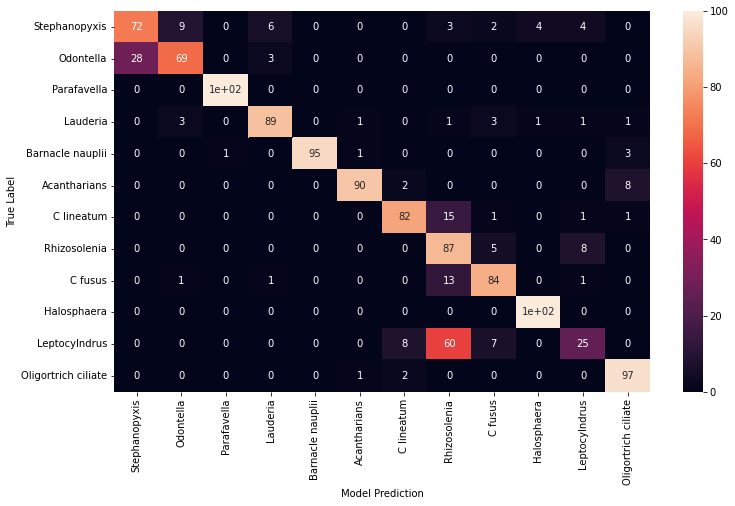


Test set: Average loss: 1.7961, Accuracy: 990/1200 (82%)

Test set: Micro F1 Score: 0.825

Test set: Macro F1 Score: 0.8193335417638198



In [ ]:
test_model(model, test_loader)